![NYC Skyline](nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

In [63]:
# Import necessary packages
import pandas as pd
import numpy as np

In [64]:
# Import datasets

price_df = pd.read_csv('data/airbnb_price.csv')
room_type_df = pd.read_excel('data/airbnb_room_type.xlsx')
review_df = pd.read_csv('data/airbnb_last_review.tsv', sep='\t')

**EDA - Exploratory Data Analysis Start Here...**

In [65]:
# First let's check some information about our datasets
price_df.head(5)

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


In [66]:
price_df.info()
print('Shape: ', price_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB
Shape:  (25209, 3)


In [67]:
print(price_df['price'].value_counts().sort_values())
print('NaN values: ', price_df['price'].isna().sum())

323 dollars      1
336 dollars      1
293 dollars      1
313 dollars      1
539 dollars      1
              ... 
75 dollars     691
50 dollars     709
60 dollars     717
100 dollars    891
150 dollars    982
Name: price, Length: 536, dtype: int64
NaN values:  0


In [68]:
# Let's extract price of accommodation from 'price' column

def extractInt(price):
    ans = ''
    price = str(price) 
    for i in range(0, len(price)):
        if price[i] == ' ':
            return int(ans)
        ans += price[i]
    return int(ans)

price_df['price'] = price_df['price'].apply(extractInt)

print(price_df.head(3))
print(type(price_df['price'][0]))

   listing_id  price             nbhood_full
0        2595    225      Manhattan, Midtown
1        3831     89  Brooklyn, Clinton Hill
2        5099    200  Manhattan, Murray Hill
<class 'numpy.int64'>


In [69]:
room_type_df.head(5)

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [70]:
room_type_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [71]:
print("NaN values: ") 
print(room_type_df.isna().sum())

NaN values: 
listing_id      0
description    10
room_type       0
dtype: int64


In [72]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [73]:
print("NaN values: ") 
print(review_df.isna().sum())

NaN values: 
listing_id     0
host_name      8
last_review    0
dtype: int64


**Statistic section**

In [74]:
print(price_df['price'].describe())

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64


**Conclusion:**  
The average nightly price is significantly higher than the median, indicating the presence of outliers such as luxury listings.


<AxesSubplot: ylabel='price'>

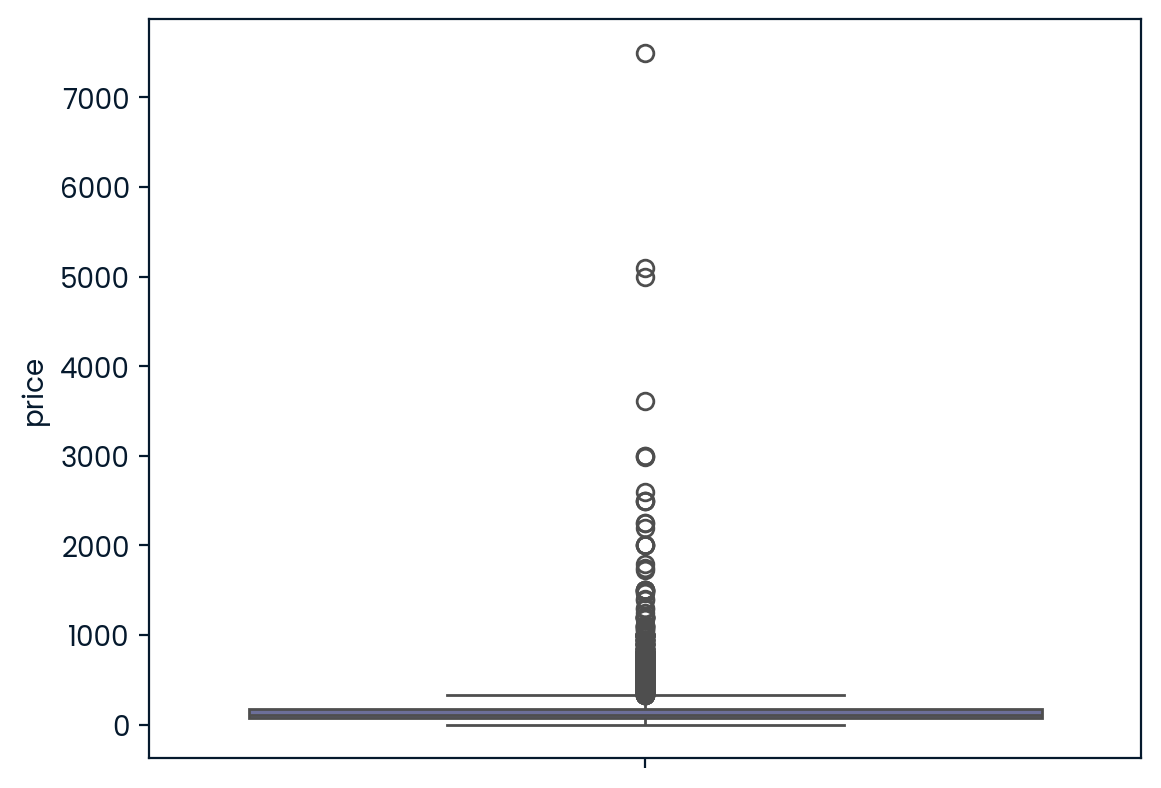

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=price_df, y='price')

**Conclusion:**  
The boxplot confirms the presence of many outliers, which could distort further analysis. Consider trimming or capping extreme values.


In [76]:
price_df.sort_values(by='price', ascending=False).head(10)

,listing_id,price,nbhood_full
23916,34895693,7500,"Brooklyn, East Flatbush"
22085,33397385,5100,"Manhattan, Midtown"
18430,30035166,5000,"Manhattan, Harlem"
21731,33029434,3613,"Manhattan, Upper West Side"
12508,22263855,3000,"Manhattan, SoHo"
24432,35297214,2995,"Manhattan, Chelsea"
13528,23860219,2990,"Manhattan, Nolita"
21838,33133321,2600,"Queens, Bayside"
1234,893413,2500,"Manhattan, East Village"
23601,34592851,2500,"Brooklyn, Crown Heights"


In [77]:
# Let's check median value for Brooklyn, East Flatbush

print('Median for Brooklyn, East Flatbush is: ', price_df[price_df['nbhood_full'] == 'Brooklyn, East Flatbush']['price'].median())

Median for Brooklyn, East Flatbush is:  79.0


We can say that this price can be misstake by adding few zeros, let's delete it

In [78]:
# Identify the outlier price that is likely a mistake by adding a few zeros
outlier_price = price_df['price'].max()

# Drop the row with the outlier price
price_df = price_df[price_df['price'] != outlier_price]

price_df.sort_values(by='price', ascending=False).head(20)

,listing_id,price,nbhood_full
22085,33397385,5100,"Manhattan, Midtown"
18430,30035166,5000,"Manhattan, Harlem"
21731,33029434,3613,"Manhattan, Upper West Side"
12508,22263855,3000,"Manhattan, SoHo"
24432,35297214,2995,"Manhattan, Chelsea"
13528,23860219,2990,"Manhattan, Nolita"
21838,33133321,2600,"Queens, Bayside"
23601,34592851,2500,"Brooklyn, Crown Heights"
1234,893413,2500,"Manhattan, East Village"
14282,25018204,2500,"Manhattan, Harlem"


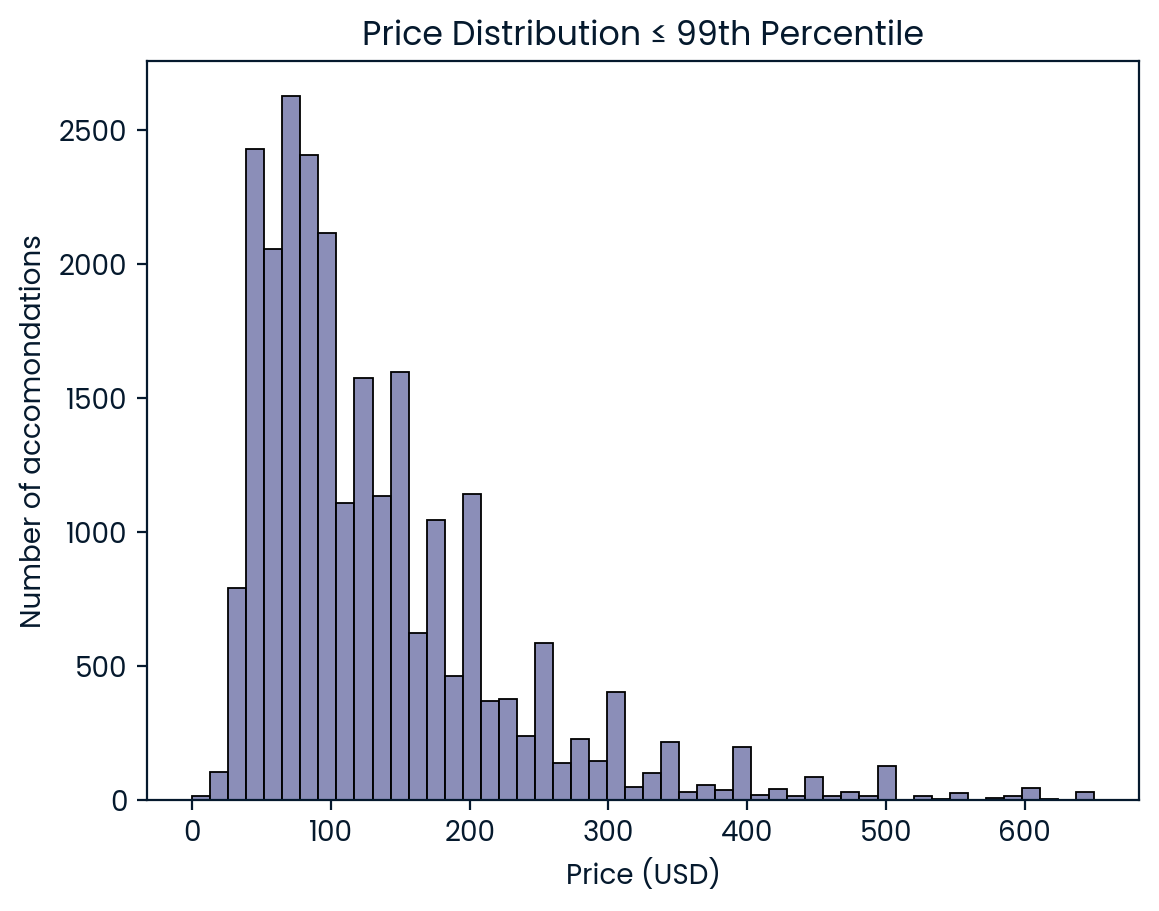

In [89]:
q3 = price_df['price'].quantile(0.99)

sns.histplot(data=price_df[price_df['price'] <= q3], x='price', bins=50)
plt.title('Price Distribution ≤ 99th Percentile')
plt.xlabel('Price (USD)')
plt.ylabel('Number of accomondations')
plt.show()

**Conclusion:**  
Most listings are priced under $500 per night. The distribution is skewed with a long tail of higher-priced properties.


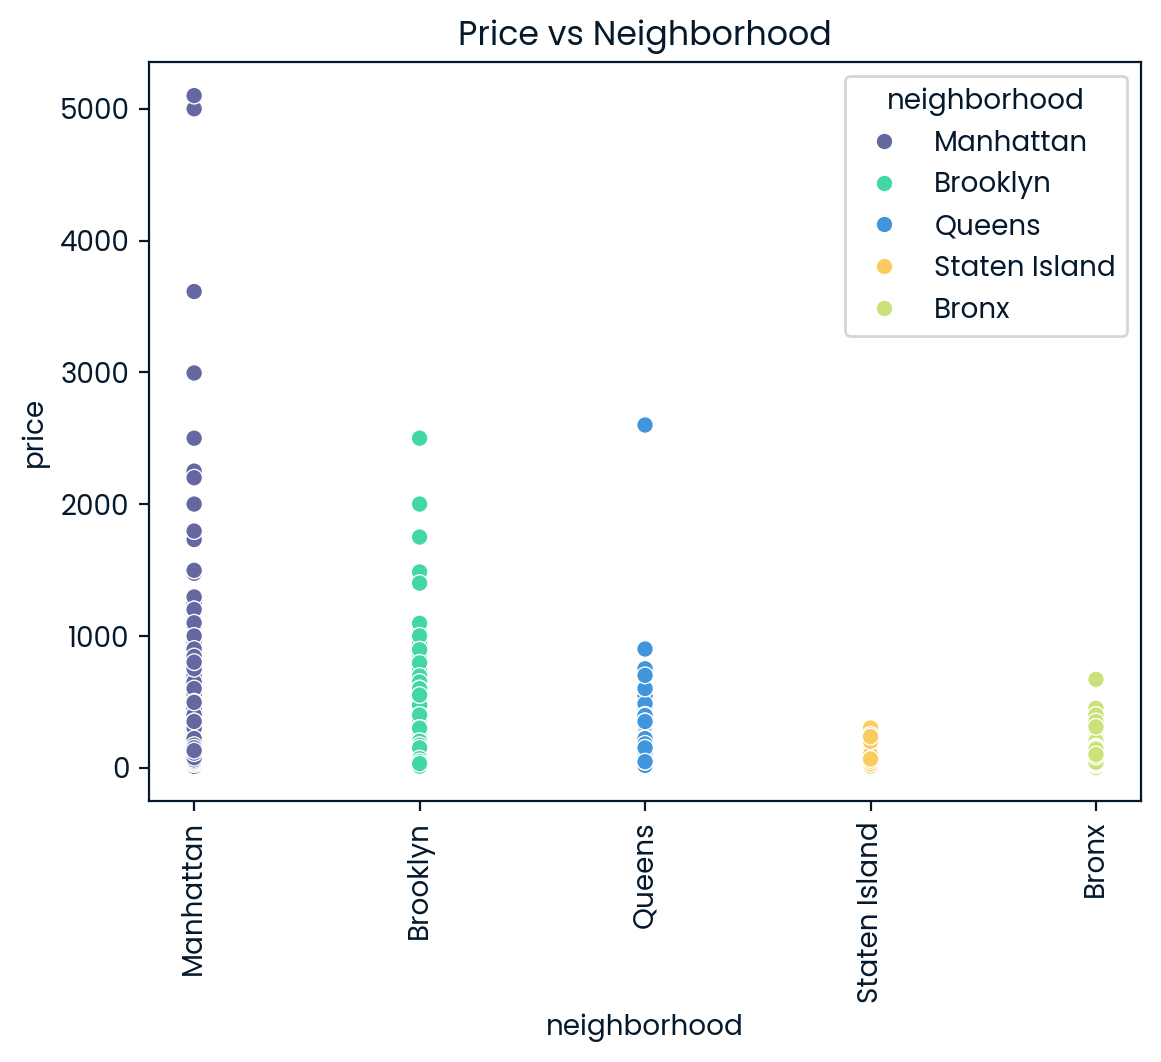

In [93]:
# Extract neighborhoods without street names and add as a new column
price_df['neighborhood'] = price_df['nbhood_full'].str.split(',').str[0]

# Price vs Neighborhood
sns.scatterplot(data=price_df, x='neighborhood', y='price', hue='neighborhood')
plt.xticks(rotation=90)
plt.ylabel('price')
plt.title('Price vs Neighborhood')
plt.show()

**Conclusion:**  
Most listings are concentrated in Manhattan and Brooklyn. Manhattan listings tend to have higher prices than those in other boroughs.


In [96]:
print("Median for each district")
print(price_df.groupby('neighborhood')['price'].median().sort_values())

Median for each district
neighborhood
Bronx             65.0
Queens            70.0
Staten Island     71.0
Brooklyn          95.0
Manhattan        149.0
Name: price, dtype: float64


Let's combined those tables into one dataframe `table`

In [97]:
# Merge the dataframes on 'listing_id'
combined_df = price_df.merge(room_type_df, on='listing_id').merge(review_df, on='listing_id')

table = combined_df

table.head()

,listing_id,price,nbhood_full,neighborhood,description,room_type,host_name,last_review
0,2595,225,"Manhattan, Midtown",Manhattan,Skylit Midtown Castle,Entire home/apt,Jennifer,May 21 2019
1,3831,89,"Brooklyn, Clinton Hill",Brooklyn,Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,July 05 2019
2,5099,200,"Manhattan, Murray Hill",Manhattan,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,June 22 2019
3,5178,79,"Manhattan, Hell's Kitchen",Manhattan,Large Furnished Room Near B'way,private room,Shunichi,June 24 2019
4,5238,150,"Manhattan, Chinatown",Manhattan,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,June 09 2019


In [102]:
print(table['room_type'].value_counts())

Entire home/apt    8458
Private room       7240
entire home/apt    2665
private room       2248
ENTIRE HOME/APT    2143
PRIVATE ROOM       1867
Shared room         380
shared room         110
SHARED ROOM          97
Name: room_type, dtype: int64


In [111]:
table['room_type'] = table['room_type'].str.lower()
print(table['room_type'].value_counts())

entire home/apt    13266
private room       11355
shared room          587
Name: room_type, dtype: int64


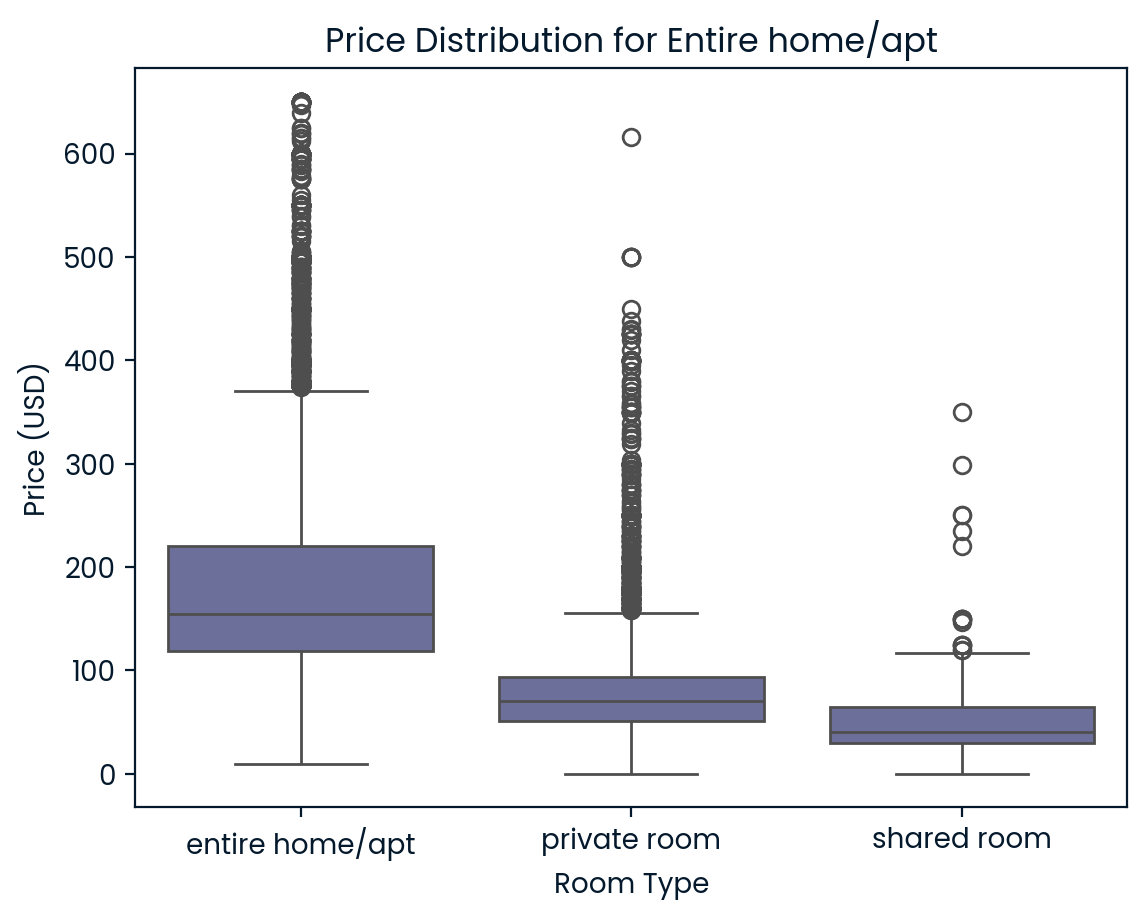

In [115]:
sns.boxplot(data=table[(table['room_type'].notnull()) & (table['price'] <= table['price'].quantile(0.99))], x='room_type', y='price')
plt.title('Price Distribution for Entire home/apt')
plt.xlabel('Room Type')
plt.ylabel('Price (USD)')
plt.show()

In [116]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25208 entries, 0 to 25207
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   listing_id    25208 non-null  int64 
 1   price         25208 non-null  int64 
 2   nbhood_full   25208 non-null  object
 3   neighborhood  25208 non-null  object
 4   description   25198 non-null  object
 5   room_type     25208 non-null  object
 6   host_name     25200 non-null  object
 7   last_review   25208 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.7+ MB


What are the dates of the earliest and most recent reviews? Store these values as two separate variables with your preferred names.

What are the dates of the earliest and most recent reviews? Store these values as two separate variables with your preferred names.

In [118]:
combined_df['last_review'] = pd.to_datetime(combined_df['last_review'], errors='coerce')

earliest_review_date = combined_df['last_review'].min()
most_recent_review_date = combined_df['last_review'].max()

earliest_review_date, most_recent_review_date

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-07-09 00:00:00'))

How many of the listings are private rooms? Save this into any variable.

In [121]:
num_private_rooms = table[table['room_type'] == 'private room']['room_type'].value_counts()
print(num_private_rooms)

private room    11355
Name: room_type, dtype: int64


What is the average listing price? Round to the nearest two decimal places and save into a variable.

In [122]:
average_listing_price = round(combined_df['price'].mean(), 2)
average_listing_price

141.49

In [123]:
first_reviewed = earliest_review_date
last_reviewed = most_recent_review_date
nb_private_rooms = num_private_rooms.values[0]
avg_price = average_listing_price

review_dates = pd.DataFrame({
    'first_reviewed': [first_reviewed],
    'last_reviewed': [last_reviewed],
    'nb_private_rooms': [nb_private_rooms],
    'avg_price': [avg_price]
})

review_dates

,first_reviewed,last_reviewed,nb_private_rooms,avg_price
0,2019-01-01,2019-07-09,11355,141.49


# Accommodation classification based on description #
### NLP section ###

Przygotowanie danych

In [127]:
df = table[['price', 'description']].dropna()

descriptions = df['description'].astype(str).tolist()

print(type(descriptions))
df.head(5)

<class 'list'>


,price,description
0,225,Skylit Midtown Castle
1,89,Cozy Entire Floor of Brownstone
2,200,Large Cozy 1 BR Apartment In Midtown East
3,79,Large Furnished Room Near B'way
4,150,Cute & Cozy Lower East Side 1 bdrm


In [128]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = model.encode(descriptions, show_progress_bar=True)

Downloading: 0.00B [00:00, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.4M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.4M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.3M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.3M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/45.2M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.3M [00:00<?, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/788 [00:00<?, ?it/s]

In [143]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

price_scaled = MinMaxScaler().fit_transform(df[['price']])

combined_features = np.hstack([embeddings, price_scaled])

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(combined_features)

df['cluster'] = labels


In [144]:
mean_price_by_cluster = df.groupby('cluster')['price'].mean().sort_values()

order = mean_price_by_cluster.index.tolist()
name_map = {
    order[0]: 'Basic',
    order[1]: 'Budget',
    order[2]: 'Standard',
    order[3]: 'Premium',
    order[4]: 'Luxury',
}

df['accommodation_class'] = df['cluster'].map(name_map)

In [146]:
df[['description', 'price', 'accommodation_class']].head(50)

,description,price,accommodation_class
0,Skylit Midtown Castle,225,Luxury
1,Cozy Entire Floor of Brownstone,89,Basic
2,Large Cozy 1 BR Apartment In Midtown East,200,Premium
3,Large Furnished Room Near B'way,79,Basic
4,Cute & Cozy Lower East Side 1 bdrm,150,Luxury
5,Beautiful 1br on Upper West Side,135,Luxury
6,Central Manhattan/near Broadway,85,Budget
7,"Lovely Room 1, Garden, Best Area, Legal rental",89,Basic
8,Wonderful Guest Bedroom in Manhattan for SINGLES,85,Budget
9,Only 2 stops to Manhattan studio,140,Budget


In [147]:
df = df[df['price'] != 0]

Let's create a simple and engaging visualization of the data we have processed

In [148]:
import plotly.express as px

fig = px.scatter(df, x='accommodation_class', y='price', 
                 color='accommodation_class', 
                 title='Price Distribution by Accommodation Class',
                 labels={'price': 'Price', 'accommodation_class': 'Accommodation Class'},
                 hover_data=['description'])

fig.show()

In [150]:
table['class'] = df['accommodation_class']
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25208 entries, 0 to 25207
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   listing_id    25208 non-null  int64         
 1   price         25208 non-null  int64         
 2   nbhood_full   25208 non-null  object        
 3   neighborhood  25208 non-null  object        
 4   description   25198 non-null  object        
 5   room_type     25208 non-null  object        
 6   host_name     25200 non-null  object        
 7   last_review   25208 non-null  datetime64[ns]
 8   class         25191 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.9+ MB


Correlation beetwen class and neighborhood area 

In [151]:
pd.crosstab(table['neighborhood'], table['class'], normalize='index')

class,Basic,Budget,Luxury,Premium,Standard
neighborhood,,,,,
Bronx,0.338594,0.228121,0.239598,0.170732,0.022956
Brooklyn,0.241007,0.230578,0.267126,0.180827,0.080463
Manhattan,0.235488,0.232290,0.309332,0.194592,0.028297
Queens,0.291377,0.248553,0.262442,0.166956,0.030671
Staten Island,0.232210,0.284644,0.265918,0.176030,0.041199


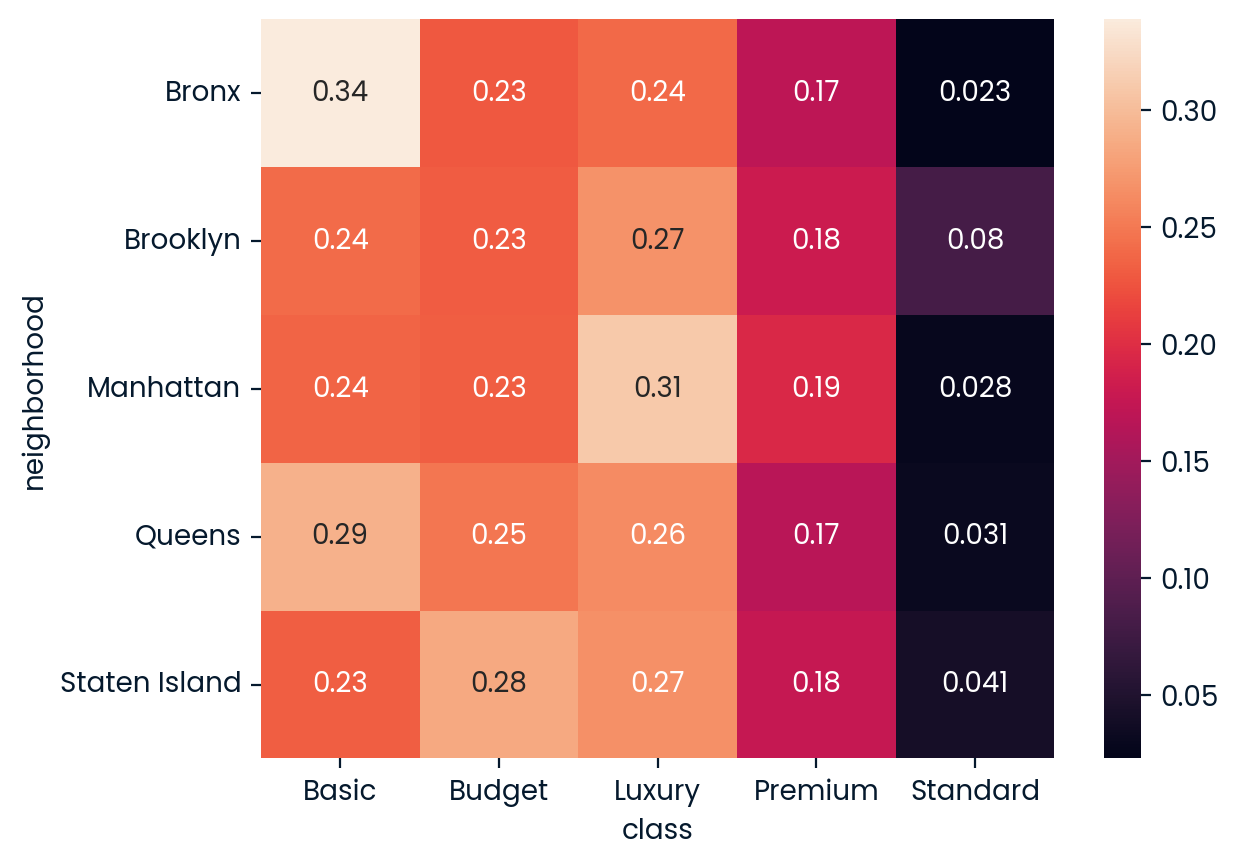

In [160]:
# Visualization

cross = pd.crosstab(table['neighborhood'], table['class'], normalize='index')

sns.heatmap(cross, annot=True)
plt.yticks(rotation=360)
plt.show()

In [162]:
table.to_csv('table.csv')